# Undersøk korpus med metadata

Notebook for å undersøke korpus med metadata


In [1]:
import nbtext as nb
from nbtext import Corpus
%matplotlib inline

In [2]:
frank = nb.get_urn({'title':'%frankenstein%', 'author':"%shelley%"})

In [3]:
frank

[[2015052808135, 'Shelley, Mary Wollstonecraft', 'Frankenstein', 1976],
 [2008022000084, 'Shelley, Mary Wollstonecraft', 'Frankenstein', 1995],
 [2008011101010, 'Shelley, Mary Wollstonecraft', 'Frankenstein', 1993]]

In [19]:
franken_navn  = nb.navn(frank[1])
franken_navn = {n:franken_navn[n] for n in franken_navn if franken_navn[n] > 4}
print([x for x in franken_navn])

['Jeg', 'De', 'Elizabeth', 'Dem', 'Deres', 'Det', 'Justine', 'Felix', 'Clerval', 'Men', 'Genéve', 'Min', 'Da', 'Frankenstein', 'Victor', 'I', 'KAPITEL', 'Dette', 'Du', 'Henry', 'M', 'Vi', 'William', 'England', 'Og', 'Safie', 'Etter', 'Mens', 'Agatha', 'En', 'Den', 'Gud', 'Disse', 'Hun', 'Ingolstadt', 'Slik', 'Elizabeths', 'Ernest', 'Han', 'Mont', 'Hvis', 'Margaret', 'Mr', 'Sveits', 'Til', 'Paris', 'Shelley', 'Akk', 'Er', 'Himmelen', 'Lacey', 'London', 'Nå', 'På', 'Agrippa', 'Din', 'Fra', 'Hvor', 'Intet', 'Moritz', 'Walton', 'Beaufort', 'Blanc', 'Livorno', 'Mitt', 'Så', 'Clervals', 'Cornelius', 'Gode', 'Hans', 'Her', 'Hvordan', 'Hvorfor', 'Italia', 'Mine', 'Nei', 'Neste', 'Oxford', 'Rhinen']


In [147]:
fnavn = [ 'Elizabeth', 'Justine', 'Felix', 'Clerval', 'din', 'vesenet','Gud', 'Guds','skapningen', 'skapning', 'vesen', 
         'monster', 'Victor',  'Henry',  'William',  'Safie',  'Agatha',  'Elizabeths', 'Ernest',   'Margaret',  'Frankenstein', 'Lacey',  'Agrippa', 'Moritz', 'Walton', 'Beaufort', 'Clervals', 'Cornelius']

In [141]:
frank[1]

[2008022000084, 'Shelley, Mary Wollstonecraft', 'Frankenstein', 1995]

In [119]:
fwords = nb.get_freq(frank[2][0], top=150000, cutoff=1)

In [136]:
fwords['vesen']

43

In [33]:
nb.make_network_graph??

In [148]:
network = nb.make_network(frank[2], fnavn)

True

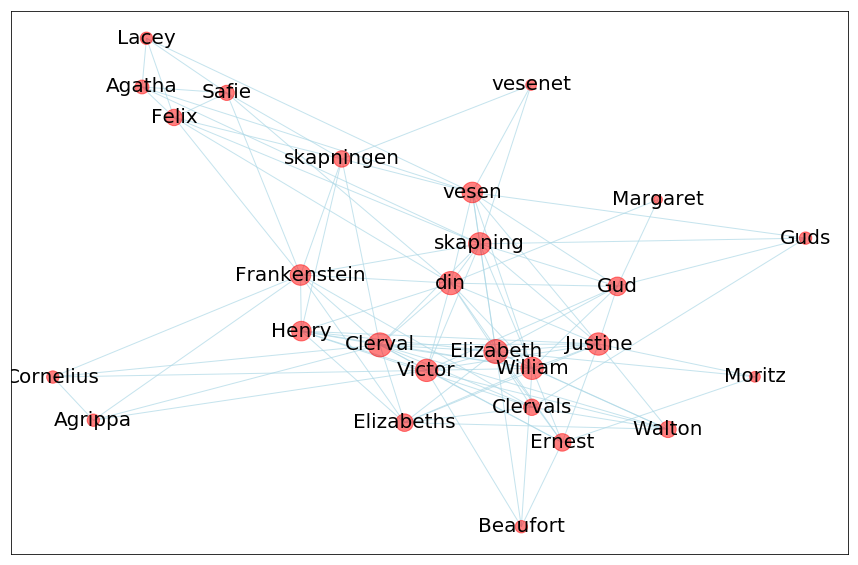

In [150]:
nb.draw_graph_centrality(network, k=0.5)

In [129]:
nb.central_betweenness_characters(network)

[('skapning', 0.13273152787285716),
 ('Clerval', 0.12416202109861393),
 ('Frankenstein', 0.11981587860121094),
 ('Elizabeth', 0.11006948417567212),
 ('vesen', 0.096792377189627),
 ('Victor', 0.06849066532030627),
 ('Justine', 0.06146058607097568),
 ('skapningen', 0.05360254478283508),
 ('William', 0.05116458888422218),
 ('Henry', 0.02694867111215469)]

In [130]:
nb.central_characters(network)

[('Clerval', 0.6363636363636364),
 ('Elizabeth', 0.5909090909090909),
 ('Victor', 0.5),
 ('William', 0.5),
 ('Justine', 0.5),
 ('skapning', 0.4545454545454546),
 ('Frankenstein', 0.4545454545454546),
 ('Henry', 0.4090909090909091),
 ('vesen', 0.36363636363636365),
 ('Elizabeths', 0.36363636363636365)]

In [194]:
skapning = nb.make_graph('skapning')

In [198]:
creation = make_graph('creature', lang='eng')

In [164]:
def make_graph(word, lang='nob'):
    import requests
    import networkx as nx
    import json
    result = requests.get("https://www.nb.no/sp_tjenester/beta/ngram_1/galaxies/query?terms={word}&corpus={lang}".format(word=word, lang=lang))
    G = nx.DiGraph()
    edgelist = []
    if result.status_code == 200:
        graph = json.loads(result.text)
        #print(graph)
        nodes = graph['nodes']
        edges = graph['links']
        for edge in edges:
            edgelist += [(nodes[edge['source']]['name'], nodes[edge['target']]['name'], abs(edge['value']))]
    #print(edgelist)
    G.add_weighted_edges_from(edgelist)
    return G

True

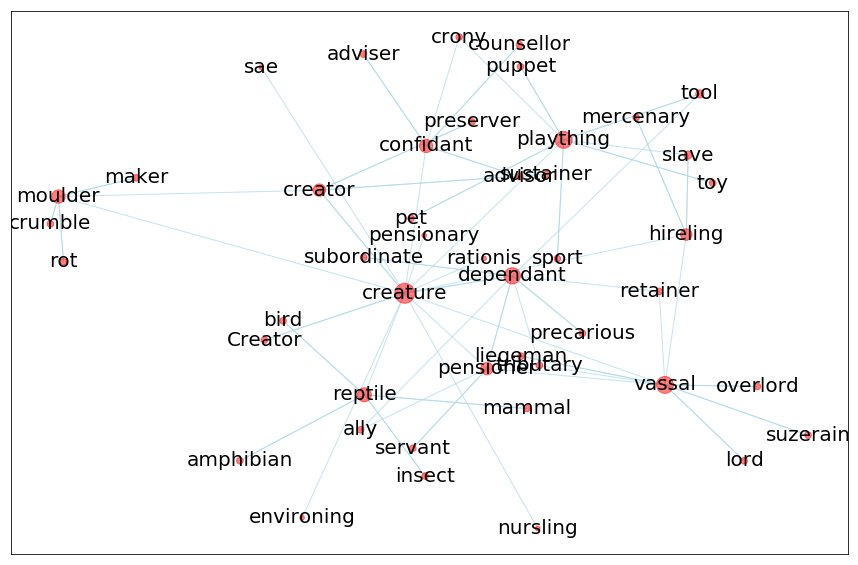

In [199]:
nb.draw_graph_centrality(creation, k=1)

True

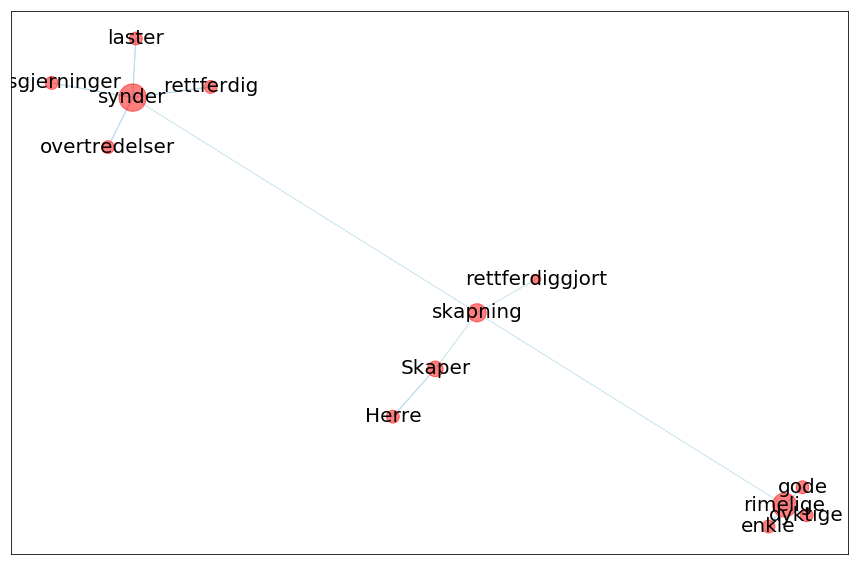

In [195]:
nb.draw_graph_centrality(skapning)

In [200]:
import pandas as pd
df_creation = pd.DataFrame.from_dict(dict(nb.central_betweenness_characters(creation, n=500)), orient='index')

In [196]:
df_skapning = pd.DataFrame.from_dict(dict(nb.central_betweenness_characters(skapning, n=500)), orient='index')

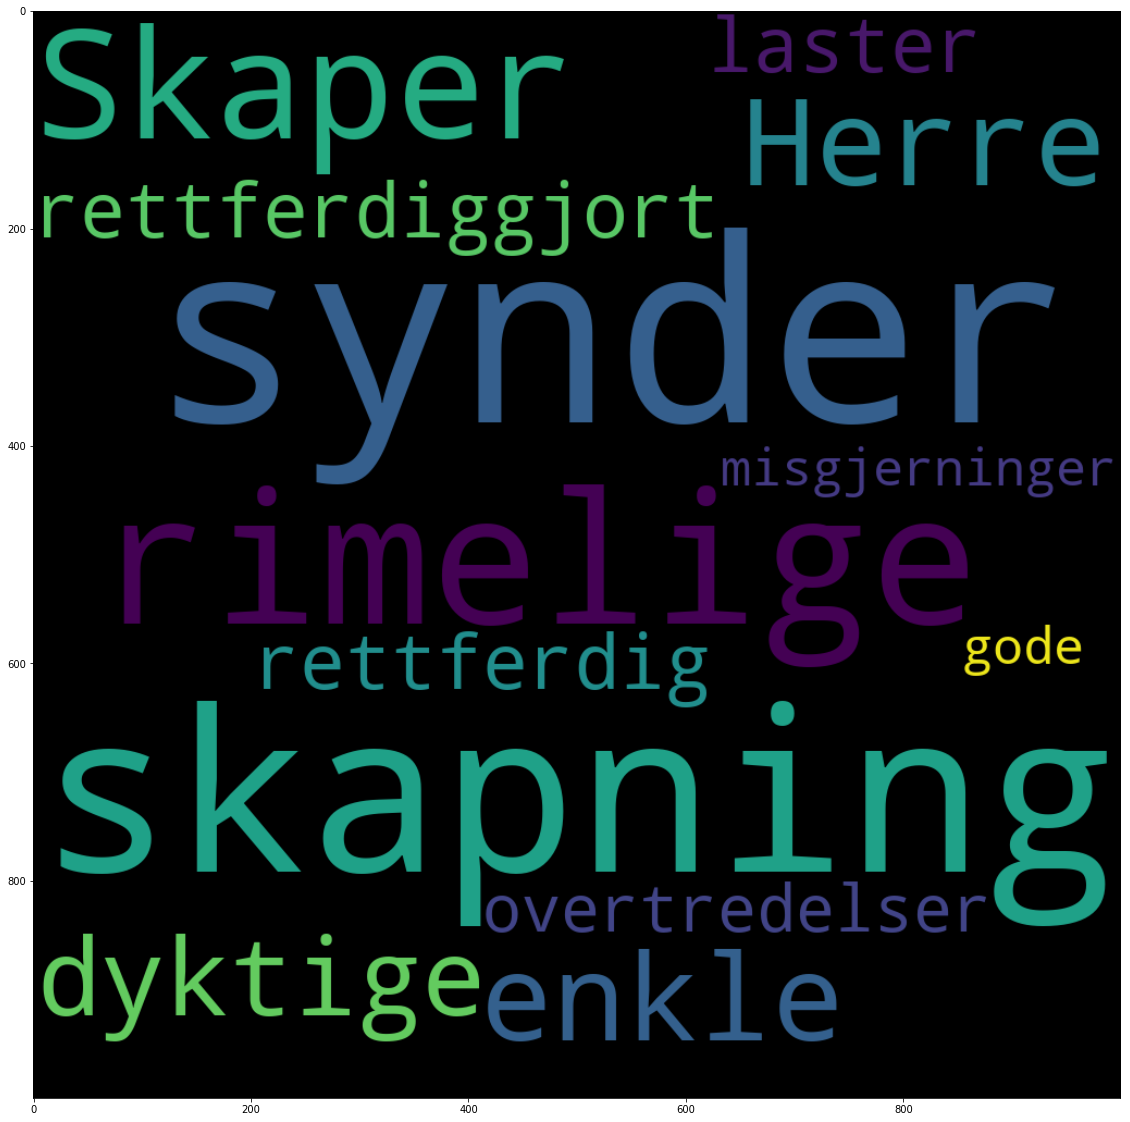

In [197]:
nb.cloud(df_skapning)

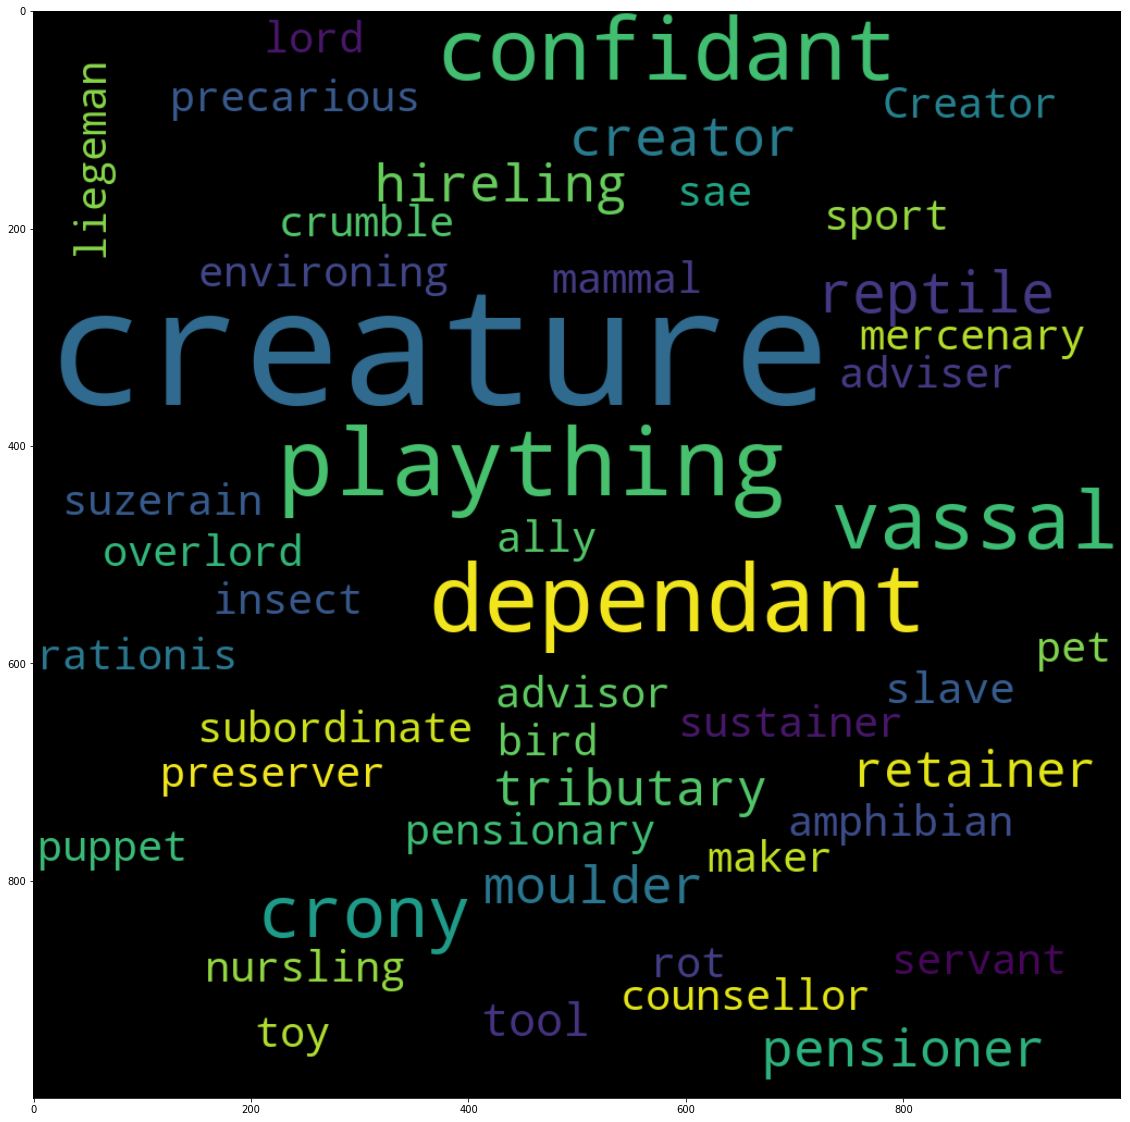

In [201]:
nb.cloud(df_creation)

In [202]:
nb.central_betweenness_characters(creation, n=500)

[('creature', 0.5244949494949495),
 ('plaything', 0.2446969696969697),
 ('dependant', 0.24065656565656565),
 ('confidant', 0.21717171717171718),
 ('vassal', 0.19797979797979798),
 ('crony', 0.1595959595959596),
 ('reptile', 0.08484848484848485),
 ('creator', 0.07373737373737374),
 ('pensioner', 0.06388888888888888),
 ('hireling', 0.06212121212121212),
 ('moulder', 0.06212121212121212),
 ('retainer', 0.05101010101010101),
 ('tributary', 0.05101010101010101),
 ('tool', 0.025252525252525252),
 ('slave', 0.011111111111111112),
 ('toy', 0.0),
 ('pensionary', 0.0),
 ('subordinate', 0.0),
 ('servant', 0.0),
 ('liegeman', 0.0),
 ('insect', 0.0),
 ('amphibian', 0.0),
 ('mammal', 0.0),
 ('bird', 0.0),
 ('mercenary', 0.0),
 ('crumble', 0.0),
 ('ally', 0.0),
 ('rot', 0.0),
 ('puppet', 0.0),
 ('precarious', 0.0),
 ('counsellor', 0.0),
 ('advisor', 0.0),
 ('adviser', 0.0),
 ('nursling', 0.0),
 ('environing', 0.0),
 ('Creator', 0.0),
 ('sae', 0.0),
 ('pet', 0.0),
 ('sport', 0.0),
 ('lord', 0.0),
 ('o